**Assignment 3 Web Scraping and Data visualiation with BeautifulSoup**

by Ke Zhang, Vu Vinh, Huijuan Zheng

The objective of this assignment is to practice web scraping using the `requests` library and `BeautifulSoup` to extract data from a webpage. The task involves scraping articles from Hacker News (https://news.ycombinator.com/), specifically focusing on extracting article titles, their associated points, and other metadata such as rank and URLs. After collecting the data, you will process and analyze it using  ‘Pandas’ and visualize the results using ‘Matplotlib’.

In [1]:
from bs4 import BeautifulSoup
import requests

from urllib.parse import urljoin
import matplotlib.pyplot as plt
import random

import pandas as pd
import time

packages to choose:
» Pattern
» Requests
» Scrapy
» BeautifulSoup
» Mechanize

BeautifulSoup pull data out of HTML and XML
parser， lxml， html5lib

for beautiful soup installation:
pip install beautifulsoup
pip install lxml
pip install html5lib

from bs4 import BeautifulSoup
import requests

with open() as html_file:
    soup = BeautifulSoup(html_file, 'lxml')

print(soup)

soup
 = BeautifulSoup(open("xxxx.html"))

 transform  a a complex tree of Python objects.

https://news.ycombinator.com/

BeautifulSoup

use different user_agent to acquire data in case the web assume it is an attack

In [2]:
user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
]

# User-Agent header to simulate a real browser request
headers = {'User-Agent': random.choice(user_agents)}

In [3]:
rows = []

In [4]:
def extractInfo(html_text):
  try:
    soup = BeautifulSoup(html_text, "lxml")
    soup.prettify()

    ranks = [ r.text.split(".")[0] for r in soup.select(".rank")]
    trs = soup.select("tr.athing.submission")

    idx = 0
    for t in soup.select(".titleline"):
      title = t.a.text
      url = t.a.get_attribute_list("href")[0]
      rank = ranks[idx]

      next_tr=trs[idx].find_next_siblings("tr")
      score_element = next_tr[0].select(".score")
      if score_element:
        score = score_element[0].text.split(" ")[0]
      else:
        score = 0

      idx = idx + 1

      rows.append({
          "rank": rank,
          "title": title,
          "url": url,
          "points": score,
      })
  except Exception as e:
    print(f"Error extracting info: {e}")

In [5]:
rows = []

for i in range(1,11):

  retry_cnt = 3
  while retry_cnt:
    try:
      print(f"retrieve data {i}...")
      base_url = f'https://news.ycombinator.com/?p={i}'

      # User-Agent header to simulate a real browser request
      headers = {'User-Agent': random.choice(user_agents)}
      response = requests.get(base_url, headers=headers)

      if response.status_code == 200:
        extractInfo(response.text)
        retry_cnt = 0
      else:
        retry_cnt = retry_cnt - 1
    except Exception as e:
      print(f"Error retrieving data {i}: {e}")
      retry_cnt = retry_cnt - 1
    time.sleep(2)

print('data retrieve ends')


retrieve data 1...
retrieve data 2...
retrieve data 3...
retrieve data 4...
retrieve data 5...
retrieve data 6...
retrieve data 7...
retrieve data 8...
retrieve data 9...
retrieve data 10...
data retrieve ends


In [6]:
rows

[{'rank': '1',
  'title': 'Cloudflare outage on November 18, 2025 post mortem',
  'url': 'https://blog.cloudflare.com/18-november-2025-outage/',
  'points': '969'},
 {'rank': '2',
  'title': 'Exploring the Limits of Large Language Models as Quant Traders',
  'url': 'https://nof1.ai/blog/TechPost1',
  'points': '29'},
 {'rank': '3',
  'title': 'Gemini 3',
  'url': 'https://blog.google/products/gemini/gemini-3/',
  'points': '1399'},
 {'rank': '4',
  'title': 'Google Antigravity',
  'url': 'https://antigravity.google/',
  'points': '868'},
 {'rank': '5',
  'title': 'What nicotine does to your brain',
  'url': 'https://economist.com/science-and-technology/2025/09/12/what-nicotine-does-to-your-brain',
  'points': '8'},
 {'rank': '6',
  'title': 'Show HN: Browser-based interactive 3D Three-Body problem simulator',
  'url': 'https://trisolarchaos.com/?pr=O_8(0.6)&n=3&s=5.0&so=0.00&im=rk4&dt=1.00e-4&rt=1.0e-6&at=1.0e-8&bs=0.15&sf=0&sv=0&cm=free&kt=1&st=1&tl=1500&cp=2.5208,1.5125,2.5208&ct=0.0

In [7]:
df = pd.DataFrame(rows)
df

,rank,title,url,points
0,1,"Cloudflare outage on November 18, 2025 post mo...",https://blog.cloudflare.com/18-november-2025-o...,969
1,2,Exploring the Limits of Large Language Models ...,https://nof1.ai/blog/TechPost1,29
2,3,Gemini 3,https://blog.google/products/gemini/gemini-3/,1399
3,4,Google Antigravity,https://antigravity.google/,868
4,5,What nicotine does to your brain,https://economist.com/science-and-technology/2...,8
...,...,...,...,...
295,296,Report claims that Apple has yet again put the...,https://arstechnica.com/gadgets/2025/11/report...,8
296,297,PPP-over-HTTP/2: Having Fun with dumbproxy and...,https://snawoot.github.io/ppp-over-http2/,5
297,298,Cloudflare down: Facebook and X among apps not...,https://metro.co.uk/2025/11/18/parts-internet-...,9
298,299,"My Tesla Robotaxi ""safety"" driver fell asleep",https://old.reddit.com/r/sanfrancisco/comments...,32


**3.Data Storage**

In [8]:
df.to_csv("Assignment3_KeZhang_VuVinh_HuijuanZheng.csv", index=False)

**4. Data Analysis and Sorting**

- Sort the articles in the DataFrame based on the points column in ascending order.

In [9]:
df["points"]=pd.to_numeric(df["points"])
sorted_df = df.sort_values(by="points", ascending=True)
sorted_df

,rank,title,url,points
27,28,Bild AI (YC W25) is hiring – Make housing affo...,https://www.ycombinator.com/companies/bild-ai/...,0
69,70,I wasted so much money on AA batteries because...,https://www.makeuseof.com/wasted-money-over-aa...,4
293,294,When Bill Gates Yelled at Me About Climate Change,https://www.theframelab.org/when-bill-gates-ye...,4
292,293,Cathedral Builders Probably Shouldn't Use Codi...,https://theahura.substack.com/p/cathedral-buil...,4
110,111,The Cloudflare outage was a good thing,https://gist.github.com/jbreckmckye/32587f2907...,5
...,...,...,...,...
2,3,Gemini 3,https://blog.google/products/gemini/gemini-3/,1399
116,117,Our investigation into the suspicious pressure...,https://adguard-dns.io/en/blog/archive-today-a...,1803
215,216,Steam Frame,https://store.steampowered.com/sale/steamframe,1911
15,16,Cloudflare Global Network experiencing issues,https://www.cloudflarestatus.com/incidents/8gm...,2364


**5. Data Visualization**

- Histogram
- Bar Plot
- Pie Chart

<Axes: title={'center': 'Histogram of Hacker News Article Points'}, ylabel='Frequency'>

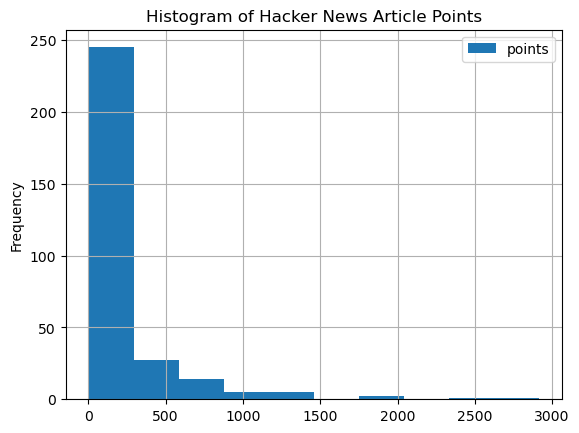

In [10]:
# Histogram
df.plot.hist(title="Histogram of Hacker News Article Points", grid=True)

In [11]:
top10_df = sorted_df.tail(10)

In [12]:
sorted_top10_df = top10_df.sort_values(by="points", ascending=False)
sorted_top10_df

,rank,title,url,points
155,156,Steam Machine,https://store.steampowered.com/sale/steammachine,2918
15,16,Cloudflare Global Network experiencing issues,https://www.cloudflarestatus.com/incidents/8gm...,2364
215,216,Steam Frame,https://store.steampowered.com/sale/steamframe,1911
116,117,Our investigation into the suspicious pressure...,https://adguard-dns.io/en/blog/archive-today-a...,1803
2,3,Gemini 3,https://blog.google/products/gemini/gemini-3/,1399
114,115,AirPods libreated from Apple's ecosystem,https://github.com/kavishdevar/librepods,1398
164,165,AI World Clocks,https://clocks.brianmoore.com/,1367
187,188,Android developer verification: Early access s...,https://android-developers.googleblog.com/2025...,1360
55,56,Show HN: I built a synth for my daughter,https://bitsnpieces.dev/posts/a-synth-for-my-d...,1250
201,202,Anthropic’s paper smells like bullshit,https://djnn.sh/posts/anthropic-s-paper-smells...,1146


<Axes: title={'center': 'Top 10 Hot articles on Hacker News Website'}, xlabel='title'>

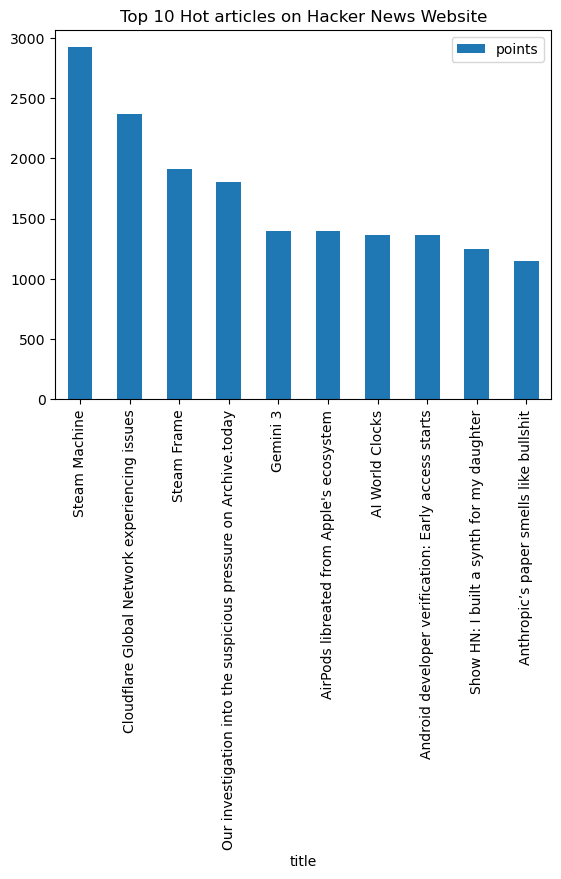

In [13]:
# Bar chart of top 10 articles with the highest points
sorted_top10_df.plot.bar(title="Top 10 Hot articles on Hacker News Website", x="title", y="points")

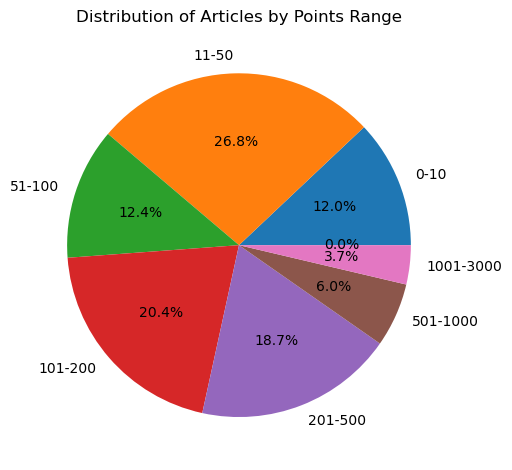

In [14]:
# Pie Chart
# calculate df by points and arrange them in different area
# 0-10, 11-20,21-30,....

bins = [0, 10, 50, 100, 200, 500, 1000, 3000, 10000]
labels = ["0-10", "11-50", "51-100", "101-200", "201-500", "501-1000", "1001-3000", "3000+"]

df["point_range"] = pd.cut(df["points"], bins=bins, labels=labels, right=True)

range_counts = df["point_range"].value_counts().sort_index()

range_counts.plot(
    kind="pie",
    autopct="%.1f%%",
    ylabel=""
)
plt.title("Distribution of Articles by Points Range")
plt.tight_layout()
plt.show()